In [1]:
include("../../../julia/FNC_init.jl")

  Activating 

project at `~/Documents/GitHub/fnc`


[**Demo %s**](#demo-trig-fft)

This function has frequency content at $2\pi$, $-2\pi$, and $\pi$.

In [2]:
f(x) = 3 * cospi(2x) - cispi(x)    # cispi(x) := exp(1im * π * x)

f (generic function with 1 method)

To use `fft`, we set up nodes in the interval $[0,2)$.

In [3]:
n = 4;  N = 2n+1;
t = [ 2j / N for j in 0:N-1 ]      # nodes in [0,2)
y = f.(t);

We perform Fourier analysis using `fft` and then examine the resulting coefficients.

In [4]:
using FFTW
c = fft(y) / N
freq = [0:n; -n:-1]
@pt :header=["k", "coefficient"] [freq round.(c, sigdigits=5)]

k,coefficient
0.0+0.0im,-2.4672e-16+1.2336e-17im
1.0+0.0im,-1.0+1.166e-16im
2.0+0.0im,1.5-4.517e-16im
3.0+0.0im,1.4396e-16-2.1411e-16im
4.0+0.0im,4.1401e-16+1.0977e-16im
-4.0+0.0im,3.1532e-16-1.2372e-16im
-3.0+0.0im,2.5079e-16+1.2775e-16im
-2.0+0.0im,1.5+4.7022e-16im
-1.0+0.0im,9.8686e-17-1.467e-17im


Note that $1.5 e^{2i\pi x}+1.5 e^{-2i\pi x} = 3 \cos(2\pi x)$, so this result is sensible.

Fourier's greatest contribution to mathematics was to point out that *every* periodic function is just a combination of frequencies—infinitely many of them in general, but truncated for computational use. Here we look at the magnitudes of the coefficients for $f(x) = \exp( \sin(\pi x) )$.

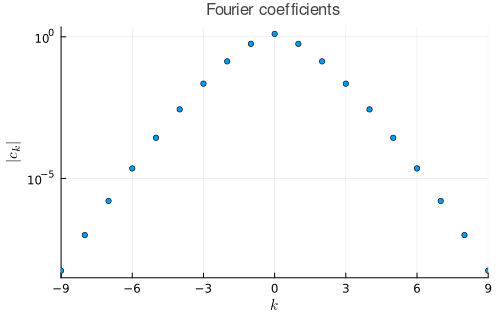

In [5]:
f(x) = exp( sin(pi*x) )     # content at all frequencies
n = 9;  N = 2n+1;
t = [ 2j / N for j in 0:N-1 ]      # nodes in [0,2)
c = fft(f.(t)) / N

freq = [0:n; -n:-1]
scatter(freq, abs.(c);
    xaxis=(L"k", [-n, n]),  yaxis=(L"|c_k|", :log10), 
    title="Fourier coefficients",  legend=:none)

The Fourier coefficients of smooth functions decay exponentially in magnitude as a function of the frequency. This decay rate is determines the convergence of the interpolation error.